In [1]:
# Exploratory Data Analysis in Python for ML/Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
drug_data = pd.read_csv("C:/Users/abhim/OneDrive/Desktop/Drug Classification ML Models/drug200.csv")

In [4]:
# See the beginning of the data
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# Check for data types and whether there are any null data in the set
print(drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


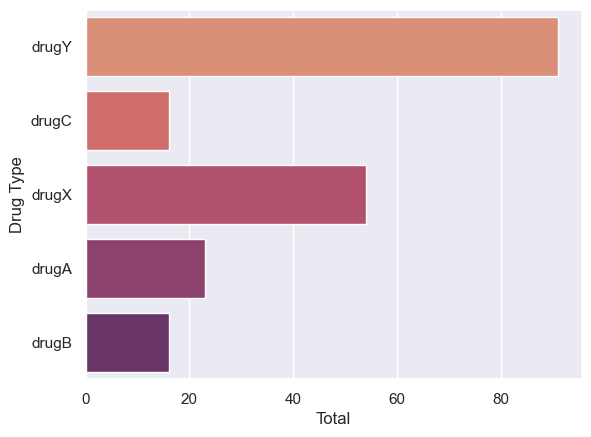

In [6]:
# With python being OOP, we can access the columns of the data file as objects
print(drug_data.Drug.value_counts()) #.Drug gives access to the Drug column and value_counts() returns a Series containing counts of unique values

# Drug type distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=drug_data, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [7]:
# It appears patients are more on Drug Y than other drugs

M    104
F     96
Name: Sex, dtype: int64


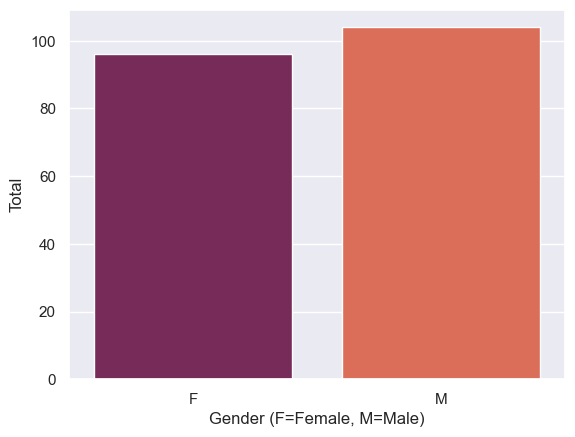

In [8]:
print(drug_data.Sex.value_counts())

sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=drug_data, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

In [9]:
# Sex is pretty balanced in the dataset

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


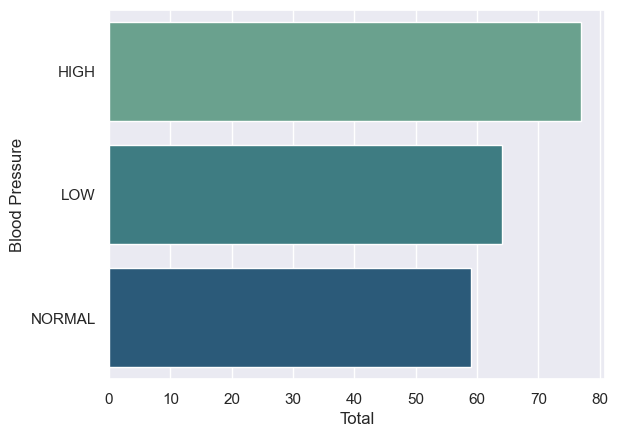

In [10]:
print(drug_data.BP.value_counts())

sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=drug_data, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

In [11]:
# Looking at the BP, it appears that there is also a relative balance in the number of patients who have high, low or normal BP. 
# Relatively more patients though have high BP.

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


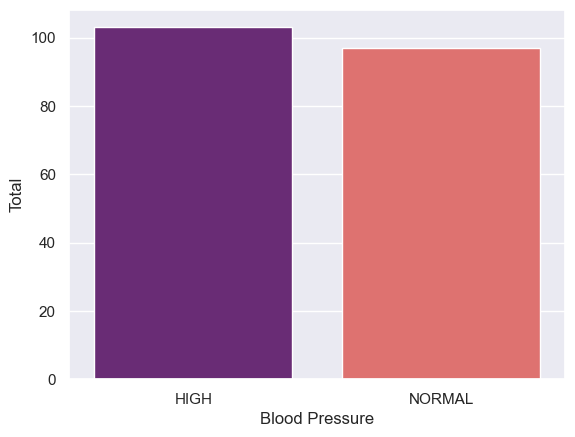

In [12]:
print(drug_data.Cholesterol.value_counts())

sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=drug_data, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

In [13]:
# Here we are given cholesterol and BP as categorical variables (just as high / low/ normal). 
# In the case of Cholesterol it appears the researcher is not interested in low cholesterol levels rather normal and high
# Since usually those are where the problematic cases of heart disease occur

In [14]:
# If we look at the data types, only age and Na/K ratio are quantitative (numeric). 
# The premise for this metric comes from NIH’s National Heart, Lung and Blood Institute (NHLBI) led research
# https://www.nih.gov/news-events/nih-research-matters/sodium/potassium-ratio-linked-cardiovascular-disease-risk

In [15]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [16]:
# Keep in mind that max age does not correlate with max Na/K ratio!

Age skewness:  0.03030835703000607


C:\Users\abhim\AppData\Local\Temp\ipykernel_28348\2858418250.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drug_data['Age']);


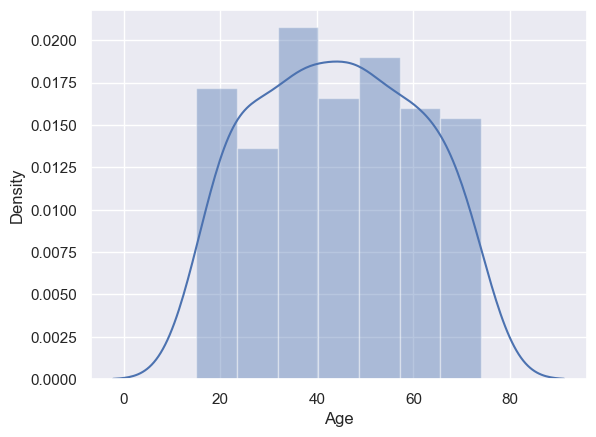

In [17]:
# Check metric of how data are distributed
# Skewness is a metric of whether the data is symmetrically (normally) distributed [or rather how assymetric the data is]
skewAge = drug_data.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

# Plot
sns.distplot(drug_data['Age']);

Na to K skewness:  1.039341186028881


C:\Users\abhim\AppData\Local\Temp\ipykernel_28348\485059803.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drug_data['Na_to_K']);


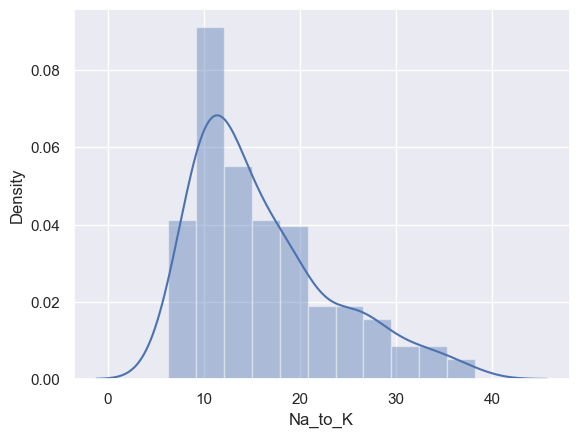

In [18]:
skewNatoK = drug_data.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

sns.distplot(drug_data['Na_to_K']);

In [19]:
# We see that the Na/K ratio is skewed right, indicating that patients have higher values of Na/K and that the data is not symmetrically distributed

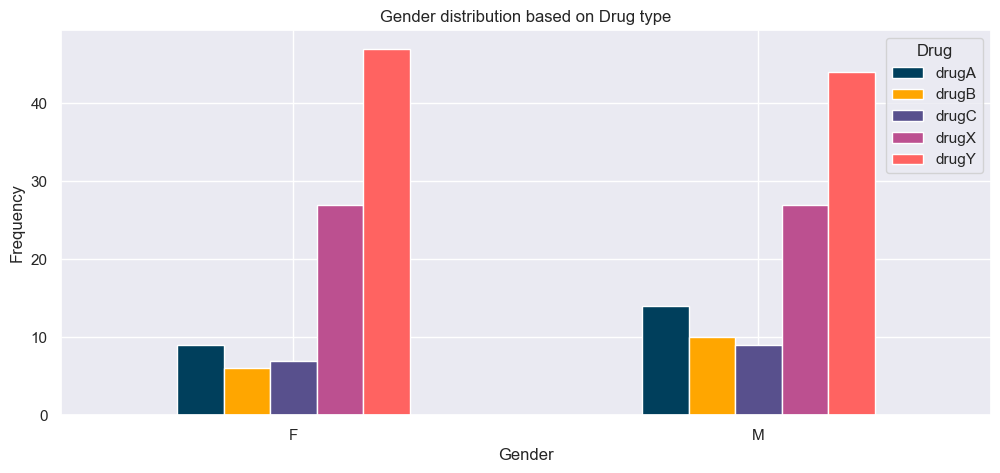

In [20]:
pd.crosstab(drug_data.Sex,drug_data.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

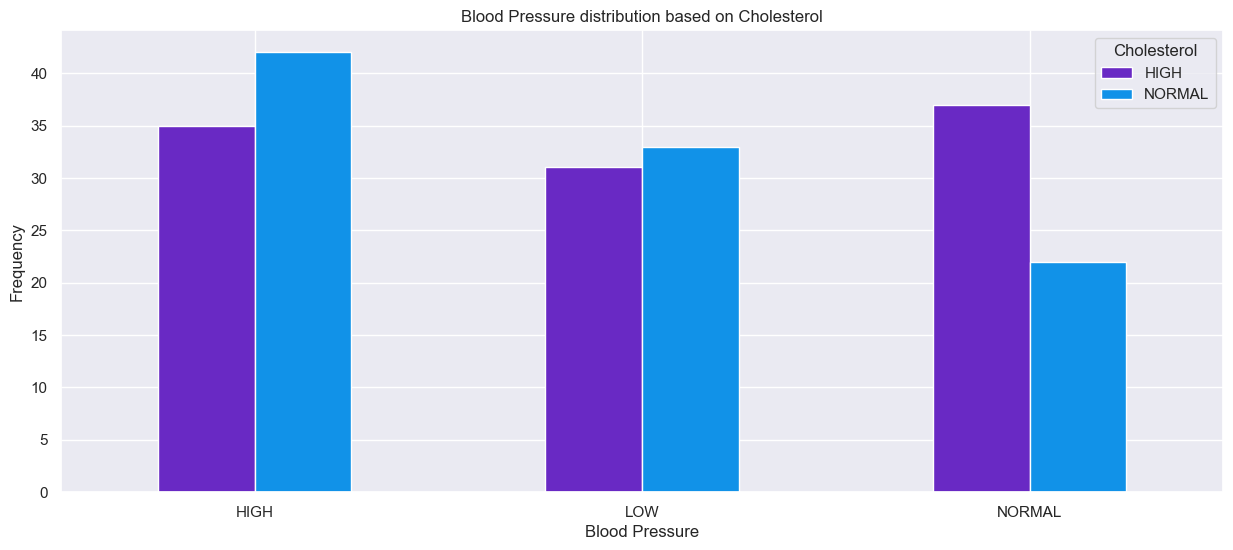

In [21]:
pd.crosstab(drug_data.BP,drug_data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

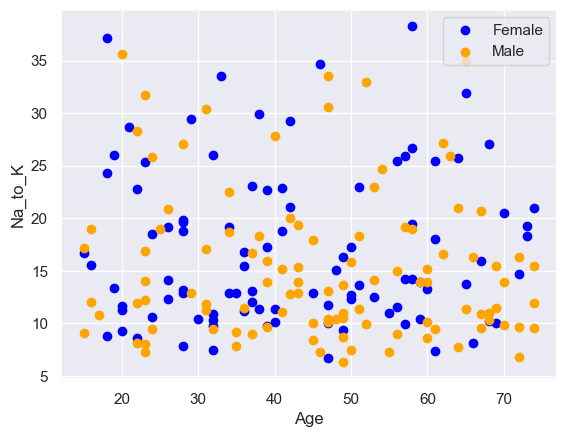

In [22]:
# Scatter Plot for Na/K vs age sorted by gender

plt.scatter(x=drug_data.Age[drug_data.Sex=='F'], y=drug_data.Na_to_K[(drug_data.Sex=='F')], c="Blue") # take all age and Na/K values by Female
plt.scatter(x=drug_data.Age[drug_data.Sex=='M'], y=drug_data.Na_to_K[(drug_data.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [23]:
# Now let's prepare the data for ML analysis

In [24]:
# The age will be divided into 7 age categories:

# Below 20 y.o. <20s
# 20 - 29 y.o.  20s
# 30 - 39 y.o.  30s
# 40 - 49 y.o.  40s
# 50 - 59 y.o.  50s
# 60 - 69 y.o.  60s
# Above 70.    >70

In [25]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
drug_data['Age_binned'] = pd.cut(drug_data['Age'], bins=bin_age, labels=category_age)
drug_data = drug_data.drop(['Age'], axis = 1)

In [26]:
# We drop the age column from the data since we bin it

drug_data

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,drugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,drugY,60s
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,50s
196,M,LOW,HIGH,12.006,drugC,<20s
197,M,NORMAL,HIGH,9.894,drugX,50s
198,M,NORMAL,NORMAL,14.020,drugX,20s


In [27]:
#  The chemical ratio will be divided into 4 categories:

# Below 10.
# 10 - 20.
# 20 - 30.
# Above 30.

In [28]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
drug_data['Na_to_K_binned'] = pd.cut(drug_data['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
drug_data = drug_data.drop(['Na_to_K'], axis = 1)

In [29]:
drug_data

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,drugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


In [30]:
# Now we have binned data for age groups and ranges of Na/K ratio. 
# We do this since the clinical research data is presented by groups of age and also the physiological parameter range

In [31]:
# Begin Machine Learning - We will do a 70/30 split on training/testing

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
# OK since the goal is to predict which drug to give the patient, we want to drop the drug column from the data set since that will be what we use as a label and also predict
X = drug_data.drop(["Drug"], axis=1) # axis = 1, drop the column. axis = 0, drop the row
y = drug_data["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# we also randomize the rows of the data by a seed so that it takes away any bias that order may confer (you'll see that in the table below)

In [34]:
# Feature Engineering - The FE method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
# Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [35]:
# To better understand what one-hot encoding has done via get_dummies lets look at part of the dataset:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [36]:
# We see that here we have put a "1" wherever the variable has a value and 0 where it does not have a value! 
# so the first row is a male patient with low BP, normal cholesterol, in the 50s with an Na/K > 30

In [37]:
y_train.head()

131    drugY
96     drugY
181    drugX
19     drugY
153    drugX
Name: Drug, dtype: object

In [38]:
# It appears that patient 131 (as we will call him) is getting drug Y! 
# And from visual, it appears the drug may be dependent on the Na/K ratio - being > 20 since patients 131, 96 and 19 are all getting Drug Y!

In [39]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [40]:
# Since we know that Drug Y is more prominent in the dataset, to balance the classification problem, we would need to use oversampling to overcome overfitting
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [41]:
# SMOTE stands for Synthetic Minority Oversampling Technique
# A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

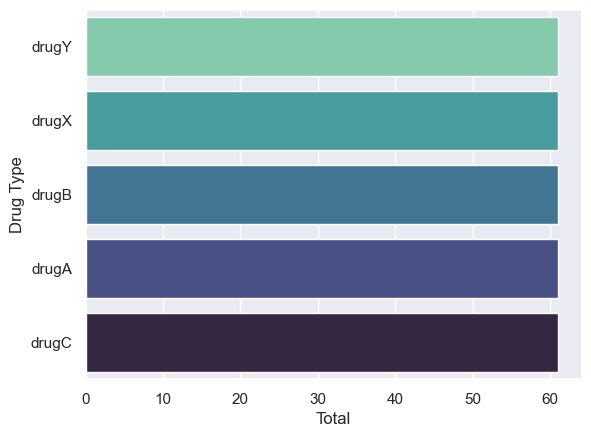

In [42]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=drug_data, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [43]:
# By resampling the minority data, we create a scenario in which the amounts of drug is more uniform to avoid any bias and overfitting in the system
# By the same token, we also resample the patient data as well! But in randomly doing so based on which patients get which drug in the training set

In [44]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000) #liblinear is a linear classifier for data supporting log reg and SVM: https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test) # we will predict which drug a patient will get based on the fit we got from training and compare it to the test labels to determine accuracy

print(classification_report(y_test, y_pred)) # how did the model perform?
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test) # In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Here y_true = y_test
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18
       drugY       0.95      0.70      0.81        30

    accuracy                           0.83        60
   macro avg       0.78      0.93      0.83        60
weighted avg       0.86      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 17  1]
 [ 2  1  2  4 21]]
Logistic Regression accuracy is: 83.33%


In [45]:
# from LR confusion matrix, we learn that drug Y had the most misclassifications! 

In [46]:
# K Neighbors Classification - based on euclidian distance of where points are relative to each other, so if we have the other parameters summarized for the x variable and our drug as y, a distance is computed, and may also be computed for each class of data
# https://www.ibm.com/topics/knn

from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20) # how many neighbors do we want to account for to classify a point?
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.40      0.80      0.53         5
       drugB       0.50      0.33      0.40         3
       drugC       0.50      0.50      0.50         4
       drugX       0.82      1.00      0.90        18
       drugY       0.86      0.63      0.73        30

    accuracy                           0.73        60
   macro avg       0.62      0.65      0.61        60
weighted avg       0.77      0.73      0.73        60

[[ 4  1  0  0  0]
 [ 1  1  0  0  1]
 [ 0  0  2  0  2]
 [ 0  0  0 18  0]
 [ 5  0  2  4 19]]
K Neighbours accuracy is: 73.33%


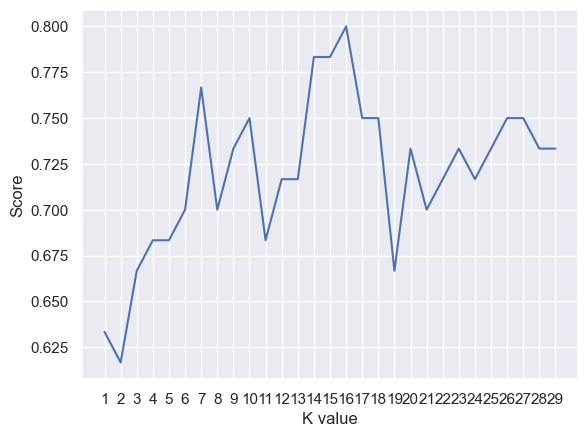

KNN Acc Max 80.00%


In [47]:
# If we are to iterate through number of neighbors to consider, what is max accuracy we can achieve with KNN?
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [48]:
# It appears this output may be GPU dependent

In [50]:
# SVM -  a supervised machine learning problem where we try to find a hyperplane that best separates the two classes. 
# This is different from LR in that LR is probabilistic, while SVM has more mathematical/statistical founding: 
# https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       0.95      0.70      0.81        30

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

[[ 4  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
SVC accuracy is: 83.33%


C:\Users\abhim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [51]:
# Naive Bayes - Uses the liklihood ratios of an event occuring to calculate the probability of a posterior event occuring
# e.g., if it is sunny outside, then we go play - P(Play|Sunny) = P(Sunny|Play)P(Play)/P(Sunny) Class probability goes in numerator
# https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

# Categorical NB - Categorical Naive Bayes is useful if the features are categorically distributed. We have to encode the categorical variable in the numeric format using the ordinal encoder for using this algorithm.
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.50      0.50         4
       drugX       0.75      1.00      0.86        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.82        60
   macro avg       0.74      0.84      0.77        60
weighted avg       0.86      0.82      0.81        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Naive Bayes accuracy is: 81.67%


In [52]:
# Gaussian NB - gaussiannb is used in classification tasks and it assumes that feature values follow a gaussian distribution.

from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.39      0.56        18
       drugY       0.63      0.97      0.76        30

    accuracy                           0.70        60
   macro avg       0.88      0.61      0.64        60
weighted avg       0.80      0.70      0.66        60

[[ 1  0  0  0  4]
 [ 0  3  0  0  0]
 [ 0  0  2  0  2]
 [ 0  0  0  7 11]
 [ 0  1  0  0 29]]
Gaussian Naive Bayes accuracy is: 70.00%


In [53]:
# If we hadn't balanced the data, we may have been able to use Complement NB - which is used on imbalanced datasets.
# However, the trend we are observing is that with most of the ML algorithms, drug Y is most misclassified

In [54]:
# Decision Trees - They are classification systems which use nodes and rely on entropy and the weight of a decision to determine how to traverse a final classification
# https://towardsdatascience.com/decision-trees-how-to-draw-them-on-paper-e2597af497f0
# https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.80      0.89      0.84        18
       drugY       0.90      0.60      0.72        30

    accuracy                           0.77        60
   macro avg       0.72      0.90      0.78        60
weighted avg       0.81      0.77      0.76        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  2]
 [ 5  1  2  4 18]]
Decision Tree accuracy is: 76.67%


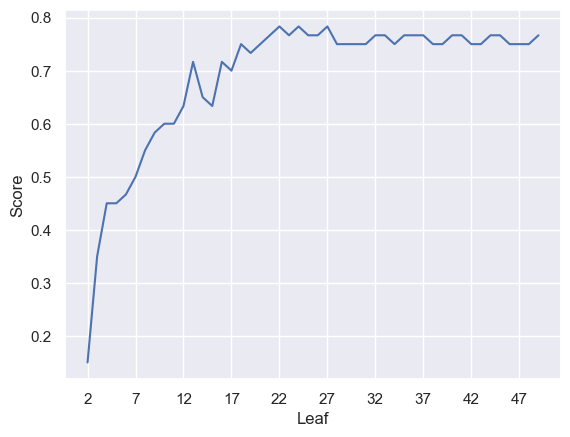

DT Acc Max 78.33%


In [55]:
# If we were to work with varying the number of nodes

scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [56]:
# Random Forest - ensemble of decision trees - Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 
# https://towardsdatascience.com/understanding-random-forest-58381e0602d2

from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.67      0.80        30

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Random Forest accuracy is: 83.33%


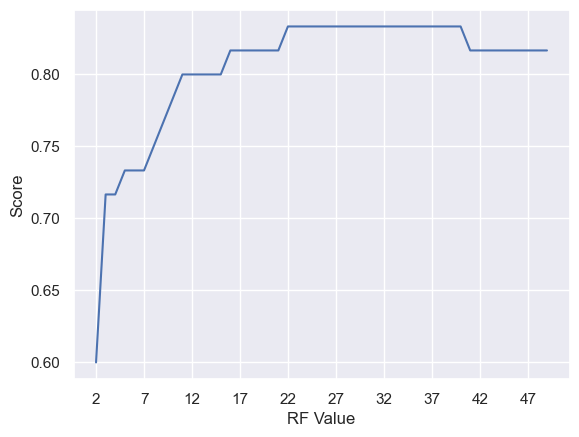

RF Acc Max 83.33%


In [57]:
# Iterate through different numbers of trees

scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [58]:
# Compare all the models

compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,83.333333
3,SVM,83.333333
8,Random Forest,83.333333
9,Random Forest Max,83.333333
4,Categorical NB,81.666667
2,K Neighbors Max,80.000000
7,Decision Tree Max,78.333333
6,Decision Tree,76.666667
1,K Neighbors,73.333333
5,Gaussian NB,70.000000


In [59]:
# Now we need to get the predicted output

pred_lr = NBclassifier1.predict(X_test)
prediction = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"], 
                           'Sex_M': X_test.loc[:,"Sex_M"], 
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"], 
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_lr})

In [60]:
# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([1, 0],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([1, 0],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([1, 0],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([1, 0],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([1, 0],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([1, 0],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([1, 0],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([1, 0],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([1, 0],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([1, 0],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([1, 0],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])

#Na to K
prediction['Na_to_K_binned_<10'] = prediction['Na_to_K_binned_<10'].replace([1, 0],['<10',''])
prediction['Na_to_K_binned_10-20'] = prediction['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
prediction['Na_to_K_binned_20-30'] = prediction['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
prediction['Na_to_K_binned_>30'] = prediction['Na_to_K_binned_>30'].replace([1, 0],['>30s',''])

prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_10-20'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_20-30'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_>30'], prediction['Na_to_K_binned_<10'])

# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

In [61]:
# Rename columns name
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

In [62]:
prediction.to_csv('prediction.csv', index=False)
predictioncsv = pd.read_csv('./prediction.csv')
predictioncsv.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugX
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,drugY
3,Male,High,Normal,20s,>30s,drugY
4,Male,Normal,High,20s,20-30,drugY


In [63]:
predictioncsv

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugX
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,drugY
3,Male,High,Normal,20s,>30s,drugY
4,Male,Normal,High,20s,20-30,drugY
5,Female,Low,Normal,20s,10-20,drugX
6,Female,Normal,High,20s,<10,drugX
7,Female,Low,Normal,30s,10-20,drugX
8,Male,Low,High,40s,10-20,drugC
9,Male,Normal,Normal,50s,<10,drugX


In [ ]:
# We have our output of a 30% split in testing hence 60 rows out of 200 original dataset